In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

dat = pd.DataFrame(pd.read_csv("meteo-vid-2018.csv", engine="python"))
dat.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [2]:
#revisamos los nombres de las columnas
dat.columns

Index(['Date', 'Time', 'batt_volt_Min', 'logger_temp', 'short_up_Avg',
       'short_dn_Avg', 'long_up_Avg', 'long_dn_Avg', 'cnr4_T_C_Avg',
       'cnr4_T_K_Avg', 'long_up_corr_Avg', 'long_dn_corr_Avg', 'Rs_net_Avg',
       'Rl_net_Avg', 'albedo_Avg', 'Rn_Avg', 'AirTC_Avg', 'RH', 'WS_ms_S_WVT',
       'WindDir_D1_WVT', 'WindDir_SD1_WVT', 'Temp_C_Avg(1)', 'Temp_C_Avg(2)',
       'Temp_C_Avg(3)', 'Temp_C_Avg(4)', 'H. suelo 60', 'Result2_Avg',
       'T. suelo 60 cm', 'Result4_Avg', 'Result5_Avg', 'Result6_Avg',
       'Result7_Avg', 'Result8_Avg', 'Result9_Avg', 'Riego'],
      dtype='object')

In [3]:
#Creamos una tabla con los valores especificados
#filtramos las columnas del archivo de datos original
dat1=pd.DataFrame(dat.filter(['Date','Time','AirTC_Avg','RH','WS_ms_S_WVT','Rn_Avg','albedo_Avg'],axis=1))

In [4]:
dat1.head()

,Date,Time,AirTC_Avg,RH,WS_ms_S_WVT,Rn_Avg,albedo_Avg
0,06/01/2018,17:00:00,27.75,20.61,2.33,1.79,0.00
1,06/01/2018,17:30:00,26.57,25.25,3.12,-18.59,0.00
2,06/01/2018,18:00:00,25.01,26.45,2.54,-35.10,0.00
3,06/01/2018,18:30:00,23.65,29.22,2.01,-40.13,-0.16
4,06/01/2018,19:00:00,22.84,31.08,2.14,-39.46,-0.15


In [5]:
#extraemos año, mes y dia de la columna Date y los agregamos al data frame como columnas

#Creamos la variable Fecho a partir de Date y Time. Desechamos dichas columnas.
dat1["Fecho"] = dat1["Date"] +" "+ dat1["Time"]
dat1.drop( ["Date","Time"], axis=1, inplace=True )

dat1.head()



,AirTC_Avg,RH,WS_ms_S_WVT,Rn_Avg,albedo_Avg,Fecho
0,27.75,20.61,2.33,1.79,0.00,06/01/2018 17:00:00
1,26.57,25.25,3.12,-18.59,0.00,06/01/2018 17:30:00
2,25.01,26.45,2.54,-35.10,0.00,06/01/2018 18:00:00
3,23.65,29.22,2.01,-40.13,-0.16,06/01/2018 18:30:00
4,22.84,31.08,2.14,-39.46,-0.15,06/01/2018 19:00:00


In [6]:
#Convertimos la variable Fecho a la variable Fecha de tipo datetime
dat1['Fecha'] = pd.to_datetime(dat1.apply(lambda x: x['Fecho'], 1), dayfirst=True)
dat1 = dat1.drop(['Fecho'], 1)


dat1['Año'] = dat1['Fecha'].dt.year
dat1['Mes'] = dat1['Fecha'].dt.month
dat1['Dia'] = dat1['Fecha'].dt.day
dat1['Hora']= dat1['Fecha'].dt.hour


In [7]:
dat1.head()

,AirTC_Avg,RH,WS_ms_S_WVT,Rn_Avg,albedo_Avg,Fecha,Año,Mes,Dia,Hora
0,27.75,20.61,2.33,1.79,0.00,2018-01-06 17:00:00,2018.0,1.0,6.0,17.0
1,26.57,25.25,3.12,-18.59,0.00,2018-01-06 17:30:00,2018.0,1.0,6.0,17.0
2,25.01,26.45,2.54,-35.10,0.00,2018-01-06 18:00:00,2018.0,1.0,6.0,18.0
3,23.65,29.22,2.01,-40.13,-0.16,2018-01-06 18:30:00,2018.0,1.0,6.0,18.0
4,22.84,31.08,2.14,-39.46,-0.15,2018-01-06 19:00:00,2018.0,1.0,6.0,19.0


In [8]:
#eliminamos la columna fecha

dat1=dat1.drop(['Fecha'],axis=1)
dat1.head()

,AirTC_Avg,RH,WS_ms_S_WVT,Rn_Avg,albedo_Avg,Año,Mes,Dia,Hora
0,27.75,20.61,2.33,1.79,0.00,2018.0,1.0,6.0,17.0
1,26.57,25.25,3.12,-18.59,0.00,2018.0,1.0,6.0,17.0
2,25.01,26.45,2.54,-35.10,0.00,2018.0,1.0,6.0,18.0
3,23.65,29.22,2.01,-40.13,-0.16,2018.0,1.0,6.0,18.0
4,22.84,31.08,2.14,-39.46,-0.15,2018.0,1.0,6.0,19.0


In [9]:
#utilizando groupby y transform, obtenemos máximos, mínimos y promedios y los agregamos
#como columnas a la data frame
dat1['albedo_Avg'] = pd.to_numeric(dat1['albedo_Avg'],errors='coerce')

dat1['RHmax']=np.round(dat1.groupby(['Dia','Mes'])['RH'].transform('max'),decimals=2)
dat1['RHmin']=np.round(dat1.groupby(['Dia','Mes'])['RH'].transform('min'),decimals=2)
dat1['RHmean']=np.round(dat1.groupby(['Mes'])['RH'].transform('mean'),decimals=2)
dat1['RHmax_m']=np.round(dat1.groupby(['Mes'])['RHmax'].transform('mean'),decimals=2)
dat1['RHmin_m']=np.round(dat1.groupby(['Mes'])['RHmin'].transform('mean'),decimals=2)




dat1['Tmax']=np.round(dat1.groupby(['Dia','Mes'])['AirTC_Avg'].transform('max'),decimals=2)
dat1['Tmin']=np.round(dat1.groupby(['Dia','Mes'])['AirTC_Avg'].transform('min'),decimals=2)

dat1['Tmean']=np.round(dat1.groupby(['Mes'])['AirTC_Avg'].transform('mean'),decimals=2)
dat1['Tmax_m']=np.round(dat1.groupby(['Mes'])['Tmax'].transform('mean'),decimals=2)
dat1['Tmin_m']=np.round(dat1.groupby(['Mes'])['Tmin'].transform('mean'),decimals=2)


dat1['Rs']=np.round(dat1.groupby(['Mes'])['Rn_Avg'].transform('mean'),decimals=2)
dat1['Vel_viento']=np.round(dat1.groupby(['Mes'])['WS_ms_S_WVT'].transform('mean'),decimals=2)


dat1['albedo']=np.round(dat1.groupby(['Mes'])['albedo_Avg'].transform('mean'),decimals=2)



In [10]:
dat1.head()

,AirTC_Avg,RH,WS_ms_S_WVT,Rn_Avg,albedo_Avg,Año,Mes,Dia,Hora,RHmax,...,RHmax_m,RHmin_m,Tmax,Tmin,Tmean,Tmax_m,Tmin_m,Rs,Vel_viento,albedo
0,27.75,20.61,2.33,1.79,0.00,2018.0,1.0,6.0,17.0,46.27,...,66.38,14.06,27.75,16.03,16.96,27.34,7.5,34.73,1.94,-0.42
1,26.57,25.25,3.12,-18.59,0.00,2018.0,1.0,6.0,17.0,46.27,...,66.38,14.06,27.75,16.03,16.96,27.34,7.5,34.73,1.94,-0.42
2,25.01,26.45,2.54,-35.10,0.00,2018.0,1.0,6.0,18.0,46.27,...,66.38,14.06,27.75,16.03,16.96,27.34,7.5,34.73,1.94,-0.42
3,23.65,29.22,2.01,-40.13,-0.16,2018.0,1.0,6.0,18.0,46.27,...,66.38,14.06,27.75,16.03,16.96,27.34,7.5,34.73,1.94,-0.42
4,22.84,31.08,2.14,-39.46,-0.15,2018.0,1.0,6.0,19.0,46.27,...,66.38,14.06,27.75,16.03,16.96,27.34,7.5,34.73,1.94,-0.42


In [11]:

#Quitamos datos repetidos por mes y reseteamos el índice.
dat1 = dat1.drop_duplicates(subset=['Mes'])
dat1=dat1.reset_index(drop=True)
dat1.head()

,AirTC_Avg,RH,WS_ms_S_WVT,Rn_Avg,albedo_Avg,Año,Mes,Dia,Hora,RHmax,...,RHmax_m,RHmin_m,Tmax,Tmin,Tmean,Tmax_m,Tmin_m,Rs,Vel_viento,albedo
0,27.75,20.61,2.33,1.79,0.00,2018.0,1.0,6.0,17.0,46.27,...,66.38,14.06,27.75,16.03,16.96,27.34,7.50,34.73,1.94,-0.42
1,12.15,51.79,2.18,-58.85,-0.51,2018.0,2.0,1.0,0.0,52.18,...,72.54,25.73,26.98,10.06,17.23,25.32,9.43,56.25,1.96,-0.48
2,9.88,61.63,1.44,-67.72,-0.55,2018.0,3.0,1.0,0.0,73.51,...,68.36,15.20,24.98,6.93,19.28,29.52,8.88,92.89,1.93,-0.41
3,13.00,53.70,1.11,-60.21,-0.77,2018.0,4.0,1.0,0.0,66.39,...,76.59,15.71,32.76,11.42,21.88,32.67,10.78,134.01,2.10,-0.39
4,16.45,64.43,1.62,-74.48,-0.72,2018.0,5.0,1.0,0.0,76.59,...,79.97,17.23,27.17,13.03,23.65,34.13,12.78,162.41,2.11,-0.37


In [12]:
dat1=dat1.drop(['Dia','Hora','AirTC_Avg','RH','Rn_Avg','WS_ms_S_WVT',\
                'albedo_Avg','Año','RHmax','RHmin','Tmin','Tmax'],axis=1)

dat1=dat1.drop(12)
#Reiniciamos el índice y agregamos los meses
mes=["Enero",'Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
dat1['Mes']=mes
dat1.set_index('Mes')
dat1

,Mes,RHmean,RHmax_m,RHmin_m,Tmean,Tmax_m,Tmin_m,Rs,Vel_viento,albedo
0,Enero,38.47,66.38,14.06,16.96,27.34,7.50,34.73,1.94,-0.42
1,Febrero,48.17,72.54,25.73,17.23,25.32,9.43,56.25,1.96,-0.48
2,Marzo,36.97,68.36,15.20,19.28,29.52,8.88,92.89,1.93,-0.41
3,Abril,40.79,76.59,15.71,21.88,32.67,10.78,134.01,2.10,-0.39
4,Mayo,44.23,79.97,17.23,23.65,34.13,12.78,162.41,2.11,-0.37
5,Junio,50.81,81.38,25.80,28.42,36.97,19.55,163.93,2.15,-0.38
6,Julio,57.64,85.18,32.81,31.07,38.42,24.49,157.53,2.02,-0.19
7,Agosto,68.87,92.54,42.21,30.12,36.99,24.70,151.27,1.91,-0.38
8,Septiembre,66.62,93.10,36.61,29.66,37.58,23.58,136.75,1.79,-0.49
9,Octubre,68.70,94.84,37.13,23.25,31.35,16.58,95.51,1.66,-0.61


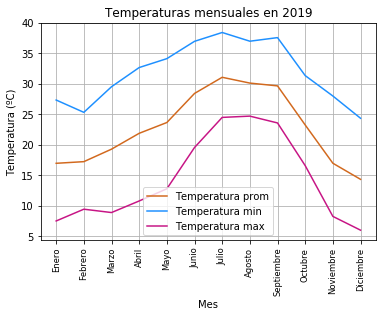

In [13]:
#Gráfica de Temperaturas, RH y Rs
X = mes                 
N = np.arange(12)         
Y1 = dat1['Tmean']     
Y2 = dat1['Tmax_m']     
Y3 = dat1['Tmin_m']     


plt.plot(Y1, label = 'Temperatura prom', color = '#D2691E')   
plt.plot(Y2, label = 'Temperatura min', color = '#1E90FF')   
plt.plot(Y3, label = 'Temperatura max', color = '#C71585')   

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.xlabel("Mes")   
plt.ylabel("Temperatura (ºC)")  
plt.legend()
plt.grid()
plt.title('Temperaturas mensuales en 2019')
plt.savefig('Fig_1',plt=2000)
plt.show()

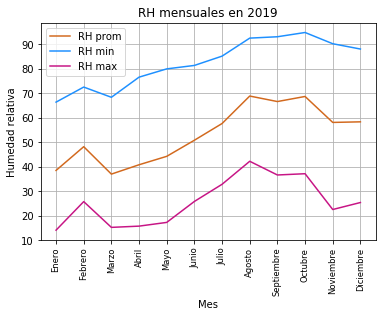

In [14]:
X = mes                 
N = np.arange(12)         
Y1 = dat1['RHmean']     
Y2 = dat1['RHmax_m']     
Y3 = dat1['RHmin_m']     


plt.plot(Y1, label = 'RH prom', color = '#D2691E')   
plt.plot(Y2, label = 'RH min', color = '#1E90FF')   
plt.plot(Y3, label = 'RH max', color = '#C71585')   

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.xlabel("Mes")   
plt.ylabel("Humedad relativa")  
plt.legend()
plt.grid()
plt.title('RH mensuales en 2019')
plt.savefig('Fig_2',plt=2000)
plt.show()

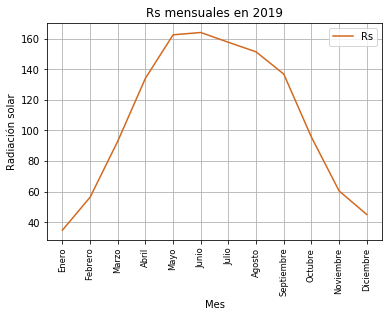

In [15]:
X = mes                 
N = np.arange(12)         
Y1 = dat1['Rs']     
    


plt.plot(Y1, label = 'Rs', color = '#D2691E')   
  

plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.xlabel("Mes")   
plt.ylabel("Radiación solar")  
plt.legend()
plt.grid()
plt.title('Rs mensuales en 2019')
plt.savefig('Fig_3',plt=2000)
plt.show()

Hasta aquì termina la primera parte. Empezamos con la parte 2

In [16]:
#ecuación de Jensen and Haise

ETo=[]

for k in range(len(dat1)):
    ETo.append((0.0252*dat1['Tmean'][k]+0.078)*dat1['Rs'][k])

In [17]:
# Ecuación (31) de Valiantzas (2012)

fi = (math.pi/180)*28.94917
ETo_1=[]

for k in range(len(dat1)):
    ETo_1.append((0.0393*dat1['Rs'][k]*(dat1['Tmean'][k]+9.5)\
                  **0.5-0.19*dat1['Rs'][k]**0.6*fi**0.15+0.0061*\
                  (dat1['Tmean'][k]+20)*(1.12*dat1['Tmean'][k]-\
                  dat1['Tmin_m'][k]-2)**0.7))

In [ ]:
#ecuación 34 de Valiantzas 4 (2013)

#Ra = 24(60)/pi (Gsc)(dr)(wsinfisindelta + cosficosdeltasinw)

#Gsc es la constante solar (Gsc=0.0820 MJm^-2min^-1)
#dr = distancia relativa entre la Tierra y el Sol
#w= ángulo de la hora donde se oculta el sol
#fi = latitud (rad)
#delta = declinación solar (rad)

In [19]:
dr = []
delta = []
w = []
φ = (math.pi/180)*28.94917
for m in range (0,len(dat1)):
   # α = dat1['albedo'][i]
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*j))
    delta.append(0.409*math.sin(((2*math.pi)/365)*j - 1.39))
    w.append(math.acos(-math.tan(φ)*math.tan(0.409*math.sin(((2*math.pi)/365)*j - 1.39))))
    
   

In [24]:
#Guardamos los arreglos en un dataframe auxiliar
df_aux = pd.DataFrame()
df_aux['dr'] = dr
df_aux['delta'] = delta
df_aux['w'] = w
df_aux = df_aux.apply(pd.to_numeric, errors='coerce')


df_aux.head()


,dr,delta,w
0,1.031906,-0.407775,1.329507
1,1.031906,-0.370216,1.354428
2,1.023584,-0.236097,1.437322
3,1.008564,-0.033386,1.552321
4,0.991711,0.172248,1.667178


In [25]:
#Calculamos Ra por mes:
φ = (math.pi/180)*28.94917
Ra = []
for i in range (0,len(dat1)):
    Ra.append(((24*60)/math.pi)*0.0820*df_aux['dr'][i]*(df_aux['w'][i]*math.sin(φ)*\
               math.sin(df_aux['delta'][i]) + math.cos(φ)*math.cos(df_aux['delta'][i])\
               *math.sin(df_aux['w'][i])))
    

In [26]:
#Convertimos el arreglo de Ra en float64:
df_aux['Ra'] = Ra

In [28]:
df_aux.dtypes

dr       float64
delta    float64
w        float64
Ra       float64
dtype: object

In [52]:
ETo_2 = [] 
for i in range (0,len(dat1)):
    ETo_2.append(0.051*(1 - dat1['albedo'][i])*\
                  dat1['Rs'][i]*(dat1\
                               ['Tmean'][i] + 9.5)**0.5 - 2.4*\
                               (dat1['Rs'][i]/df_aux['Ra']\
                                [i])**2 + 0.048*(dat1\
                                ['Tmean'][i] + 20)*\
                                (1 - dat1['RHmean']\
                                 [i]/100)*(0.5 + 0.536*dat1\
                                 ['Vel_viento'][i]) + 0.00012*101)



In [53]:
ETo_2

[7.6443149740199621,
 7.275746178032815,
 7.4551006686248575,
 13.585048682344414,
 21.360889660441352,
 32.865056758568208,
 27.185697278240774,
 34.52442781074231,
 35.073393178913982,
 26.435253461651353,
 15.950746580457485,
 8.6037376986471337]

In [56]:
ETO=pd.DataFrame()
ETO['ETo_7']=ETo
ETO['ETo_31']=ETo_1
ETO['ETo_34']=ETo_2
ETO['Mes']=mes
ETO

,ETo_7,ETo_31,ETo_34,Mes
0,17.552264,6.669480,7.644315,Enero
1,28.811025,10.466810,7.275746,Febrero
2,52.376584,18.243966,7.455101,Marzo
3,84.342678,27.693491,13.585049,Abril
4,109.461092,34.603153,21.360890,Mayo
5,130.190583,37.524763,32.865057,Junio
6,135.627659,37.233995,27.185697,Julio
7,126.616620,35.133306,34.524428,Agosto
8,112.877826,31.608780,35.073393,Septiembre
9,63.409089,19.913380,26.435253,Octubre


In [57]:
ETO.set_index('Mes')

,ETo_7,ETo_31,ETo_34
Mes,,,
Enero,17.552264,6.669480,7.644315
Febrero,28.811025,10.466810,7.275746
Marzo,52.376584,18.243966,7.455101
Abril,84.342678,27.693491,13.585049
Mayo,109.461092,34.603153,21.360890
Junio,130.190583,37.524763,32.865057
Julio,135.627659,37.233995,27.185697
Agosto,126.616620,35.133306,34.524428
Septiembre,112.877826,31.608780,35.073393
